## Repo to Submission

#### https://github.com/devpateltech007/CMPE257-Fall25-DevVijaykumar-Patel

# Ans1

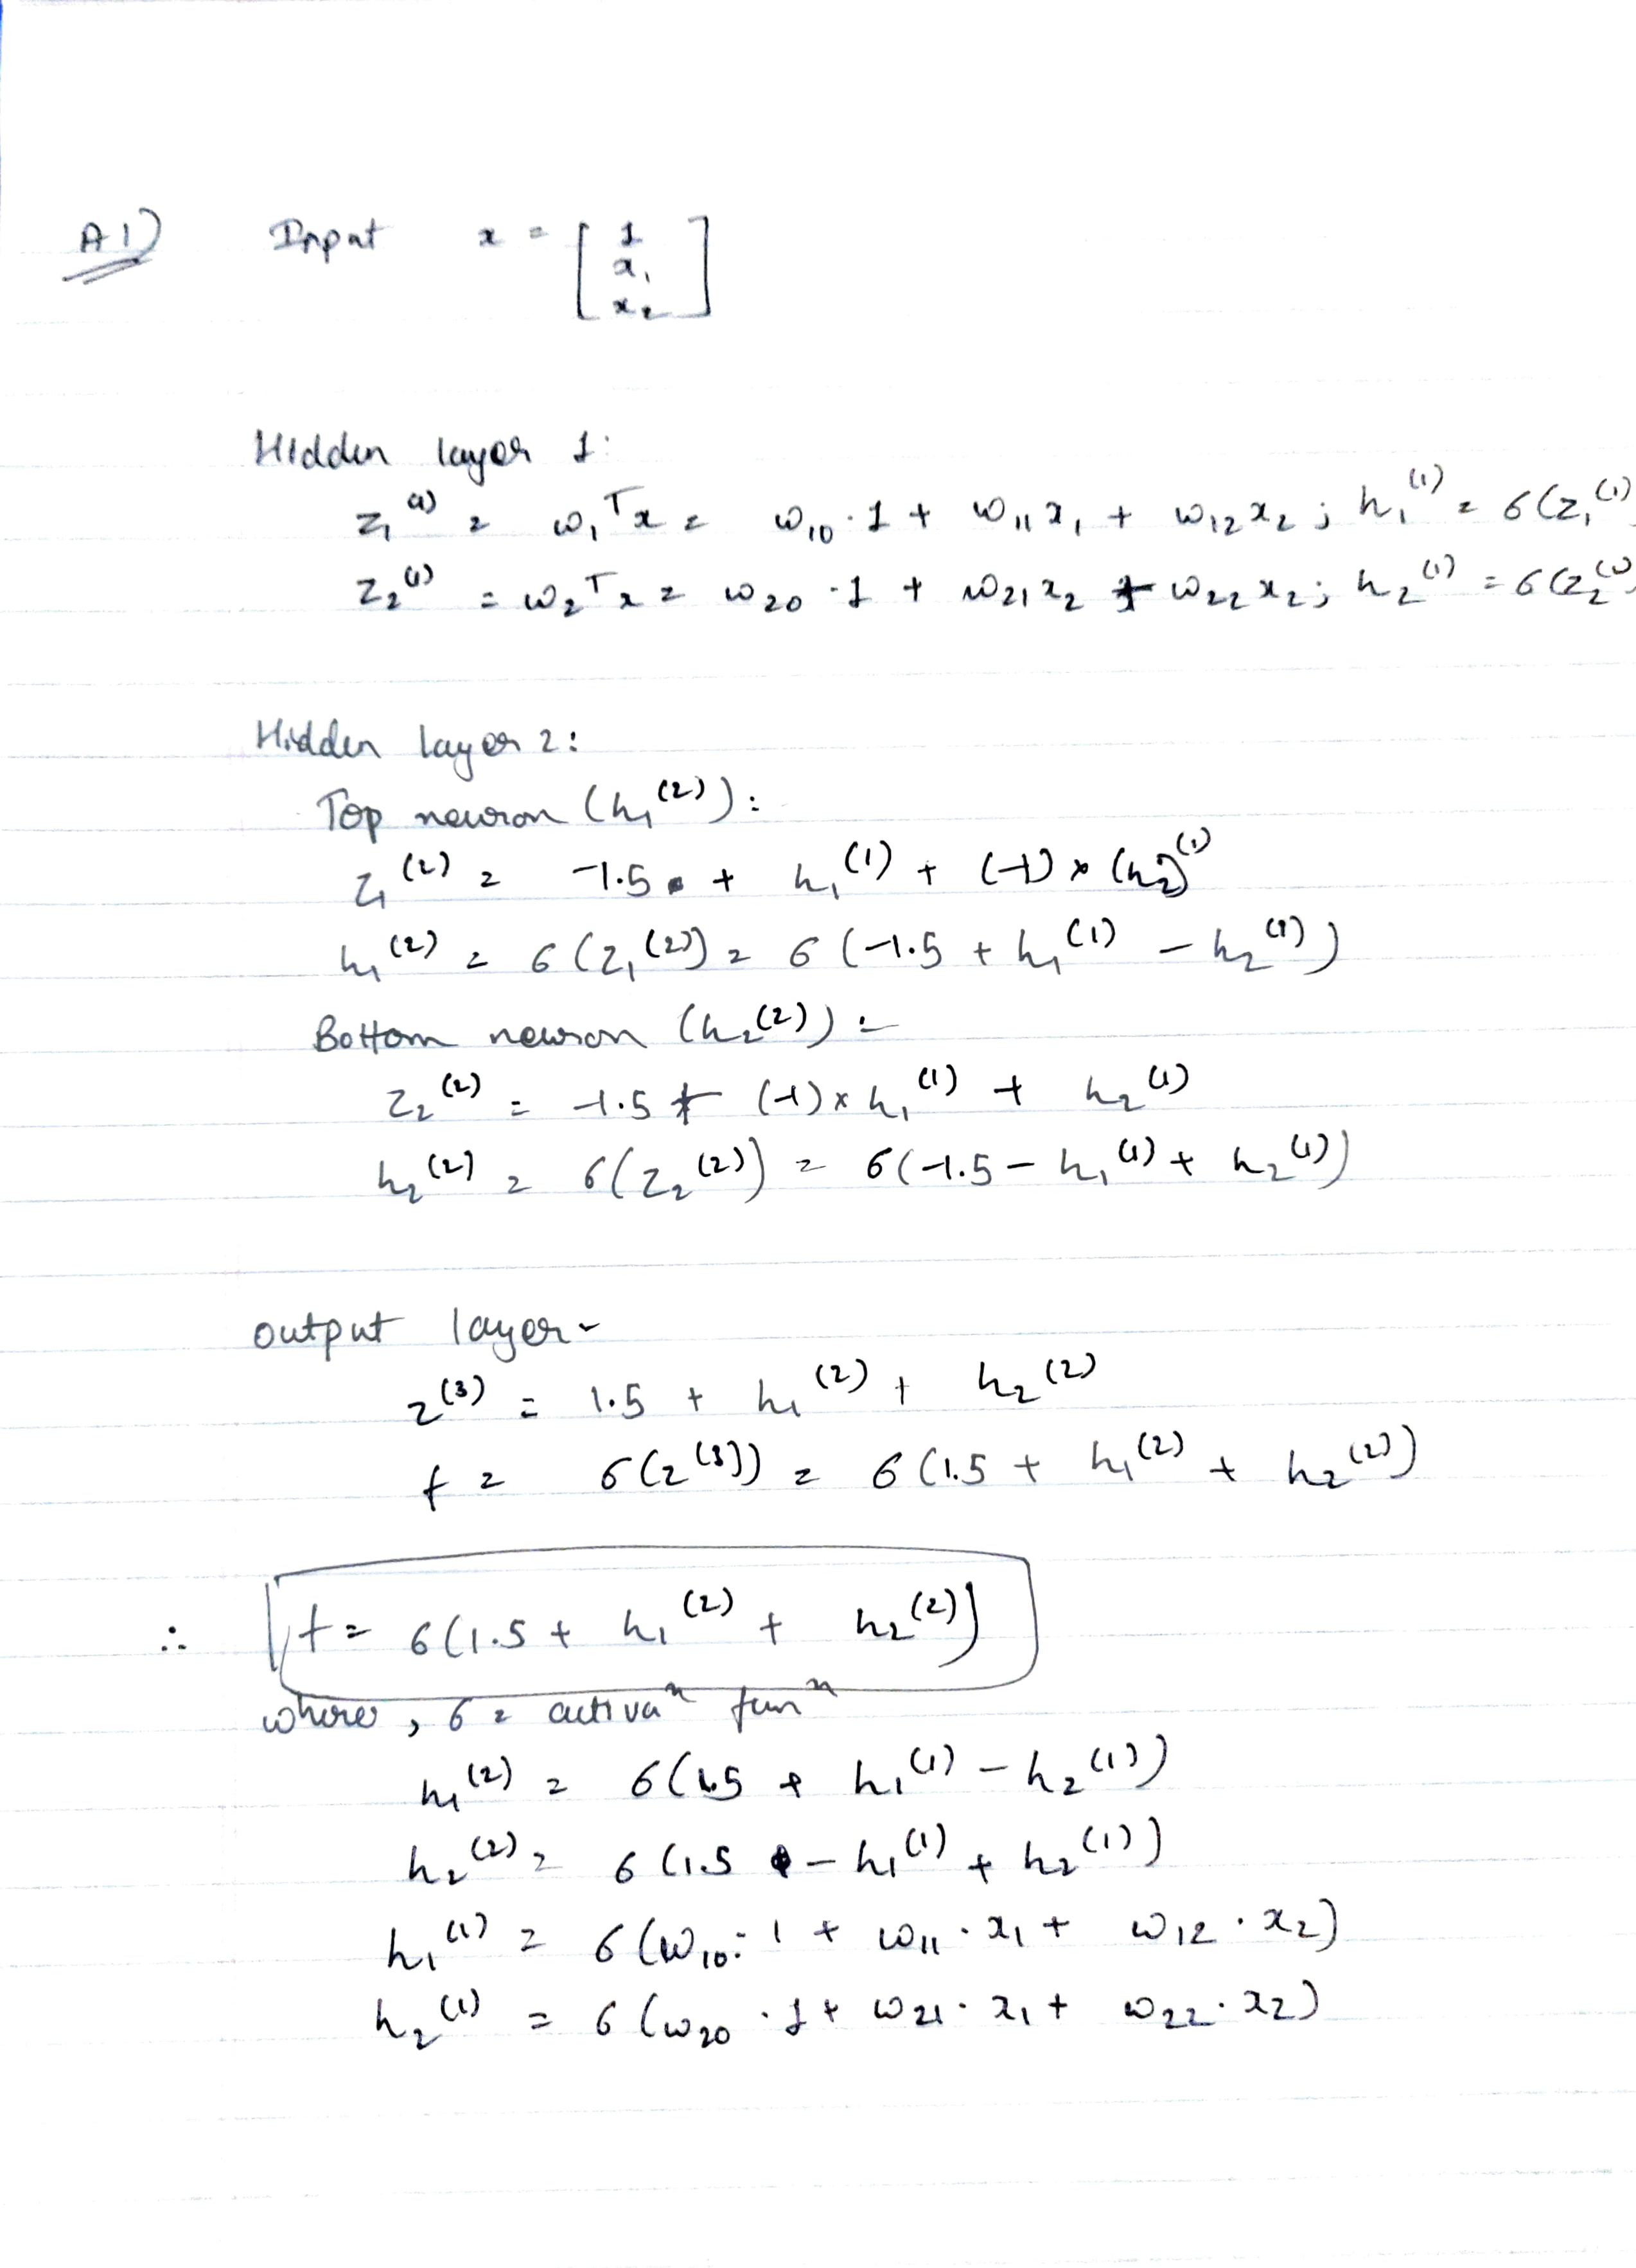

# Ans2:

## Part 1

In [1]:
import numpy as np

# Activation and derivative
def activation_fn(x):
    return np.tanh(x)

def activation_derivative(x):
    return 1 - np.tanh(x) ** 2

# Forward propagation
def forward_pass(inputs, weights_h, bias_h, weights_o, bias_o):
    net_h = np.dot(weights_h, inputs) + bias_h
    out_h = activation_fn(net_h)
    net_o = np.dot(weights_o, out_h) + bias_o
    out_o = net_o  # linear output
    return out_h, out_o

# Backward propagation
def backward_pass(inputs, target, weights_h, bias_h, weights_o, bias_o):
    hidden_out, output_pred = forward_pass(inputs, weights_h, bias_h, weights_o, bias_o)
    
    loss_grad = output_pred - target
    grad_o = loss_grad
    grad_weights_o = np.outer(grad_o, hidden_out)
    grad_bias_o = grad_o

    grad_h = np.dot(weights_o.T, grad_o) * activation_derivative(hidden_out)
    grad_weights_h = np.outer(grad_h, inputs)
    grad_bias_h = grad_h

    return grad_weights_h, grad_bias_h, grad_weights_o, grad_bias_o, loss_grad

## Part 2: 

In [2]:
# Gradient descent training
def fit_network(features, targets, hidden_units, learning_rate=0.01, iterations=1000):
    n_samples, n_features = features.shape
    weights_hidden = np.random.randn(hidden_units, n_features) * 0.1
    bias_hidden = np.zeros((hidden_units, 1))
    weights_output = np.random.randn(1, hidden_units) * 0.1
    bias_output = np.zeros((1, 1))
    
    for epoch in range(iterations):
        epoch_loss = 0
        for i in range(n_samples):
            x = features[i].reshape(-1, 1)
            y = targets[i].reshape(-1, 1)
            
            grad_w_h, grad_b_h, grad_w_o, grad_b_o, err = backward_pass(
                x, y, weights_hidden, bias_hidden, weights_output, bias_output
            )
            
            weights_hidden -= learning_rate * grad_w_h
            bias_hidden -= learning_rate * grad_b_h
            weights_output -= learning_rate * grad_w_o
            bias_output -= learning_rate * grad_b_o
            epoch_loss += np.sum(err ** 2)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Mean Squared Loss: {epoch_loss / n_samples}")
    
    return weights_hidden, bias_hidden, weights_output, bias_output

## Predict function

In [3]:
def make_predictions(features, weights_h, bias_h, weights_o, bias_o):
    n_samples = features.shape[0]
    preds = np.zeros((n_samples, 1))
    for i in range(n_samples):
        x = features[i].reshape(-1, 1)
        _, y_pred = forward_pass(x, weights_h, bias_h, weights_o, bias_o)
        preds[i] = y_pred
    return preds

## Tests and results

In [4]:
if __name__ == "__main__":
    # Example dataset: y = x1 + x2
    X_data = np.array([[0.1, 0.2], [0.4, 0.5], [0.6, 0.9], [0.8, 0.3]])
    Y_data = np.array([[0.3], [0.9], [1.5], [1.1]])
    
    w_h, b_h, w_o, b_o = fit_network(X_data, Y_data, hidden_units=5, learning_rate=0.01, iterations=1000)
    y_preds = make_predictions(X_data, w_h, b_h, w_o, b_o)
    print("Predicted Outputs:\n", y_preds)

Epoch 0, Mean Squared Loss: 1.0764070948069475
Epoch 100, Mean Squared Loss: 0.14685323070920142
Epoch 200, Mean Squared Loss: 0.1104592610384265
Epoch 300, Mean Squared Loss: 0.06802053717410317
Epoch 400, Mean Squared Loss: 0.032279273899984647
Epoch 500, Mean Squared Loss: 0.011797151384482835
Epoch 600, Mean Squared Loss: 0.003601791966487106
Epoch 700, Mean Squared Loss: 0.0010734653143687713
Epoch 800, Mean Squared Loss: 0.0003972684153332604
Epoch 900, Mean Squared Loss: 0.0002224949837106088
Predicted Outputs:
 [[0.29467004]
 [0.91859142]
 [1.48328793]
 [1.10408368]]
